## **Prediction using K-Means Clustering Algorithm on the Given Iris Dataset**
#### Author - Subhajit Saha

#### **Objective:**
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

<h4><b>Importing Required Libraries</b></h4>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as ss
ss.set_theme()

<h4><b>Importing the csv file and converting into a Dataframe<b></h4>

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h4><b>Dropping the ID column and output the first 5 rows of the Dataframe for checking</b></h4>

In [3]:
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h2><u><b>Exploratory Data Analysis on IRIS dataset</b></u></h2>
<h4><b>Essential Characteristics of the IRIS dataframe</b></h4>

In [4]:
print("The shape of the Iris Dataset is: ",iris.shape)

The shape of the Iris Dataset is:  (150, 5)


In [5]:
print("The columns of the Iris Dataset columns is: "
      ,iris.columns)

The columns of the Iris Dataset columns is:  Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

<h4><b>Making a seperate column named "Grouping" to check the resultant clusters later with the original data</b></h4>
<h4>Codes</h4>
Iris-Setosa - 1; 
Iris-versicolor - 0;
Iris-virginica - 2; 

In [9]:
iris["Grouping"] = iris["Species"]
iris.loc[iris["Grouping"]=="Iris-setosa",'Grouping']=1
iris.loc[iris["Grouping"]=="Iris-versicolor",'Grouping']=0
iris.loc[iris["Grouping"]=="Iris-virginica",'Grouping']=2

In [10]:
iris.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Grouping
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:
y_original = np.array(iris["Grouping"])
y_original

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

<h2><u><b>Data Visulizations</b></u></h2>
<h4><b>Plotting out the scatter matrix to spot clusters in the dataset with all attributes<b></h4>

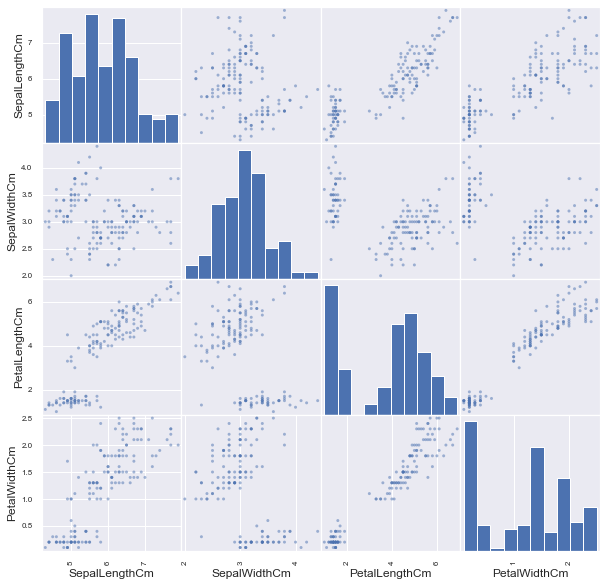

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris,figsize=(10,10))
plt.show()

<h4><b>Plotting out the heatmap according to the correlation among various attributes</b></h4>

<AxesSubplot:>

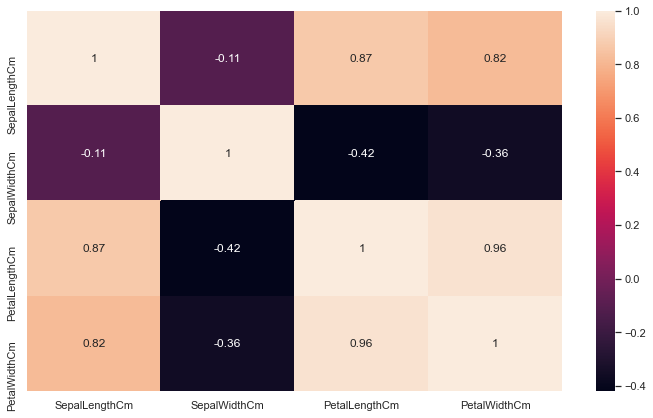

In [13]:
plt.figure(figsize=(12,7))
ss.heatmap(iris.corr(),annot=True)

<h4><b>Plotting the pairplot among the attributes to denote original clusters</b></h4>

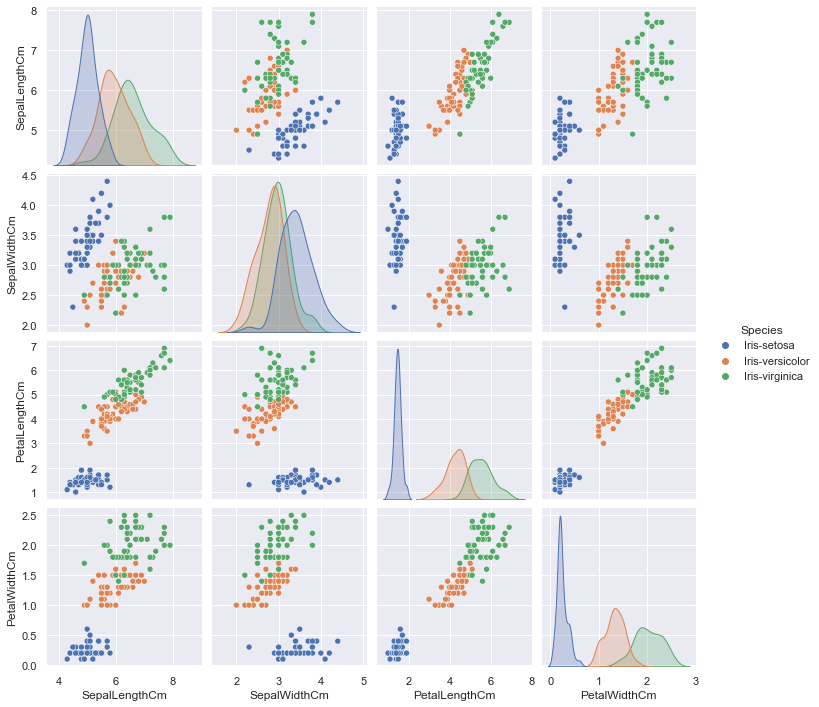

In [14]:
ss.pairplot(iris.drop(['Grouping'],axis=1),hue="Species")

<h4><b>Plotting the barplot of SepalLength for various species</b></h4>

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

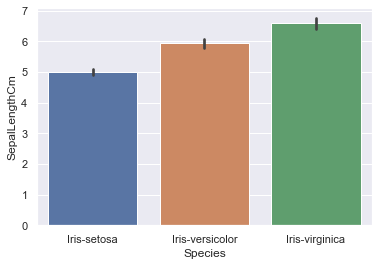

In [15]:
ss.barplot(x="Species",y="SepalLengthCm",data=iris)

<h4><b>Plotting the barplot of SepalWidth for various species</b></h4>

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

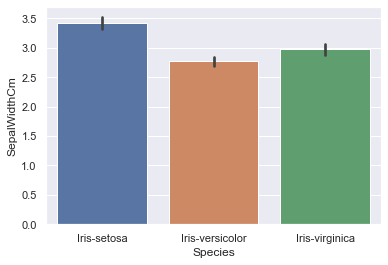

In [16]:
ss.barplot(x="Species",y="SepalWidthCm",data=iris)

<h4><b>Plotting the barplot of PetalLength for various species</b></h4>

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

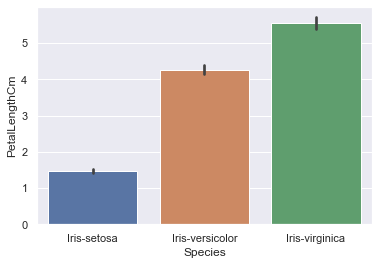

In [17]:
ss.barplot(x="Species",y="PetalLengthCm",data=iris)

<h4><b>Plotting the barplot of PetalWidth for various species</b></h4>

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

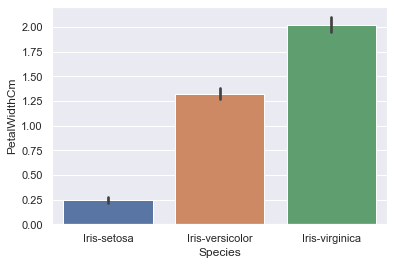

In [18]:
ss.barplot(x="Species",y="PetalWidthCm",data=iris)

<h4><b>Plotting the PetalLength FacetGrid for different species for getting the Frequency Distrubution</b></h4>

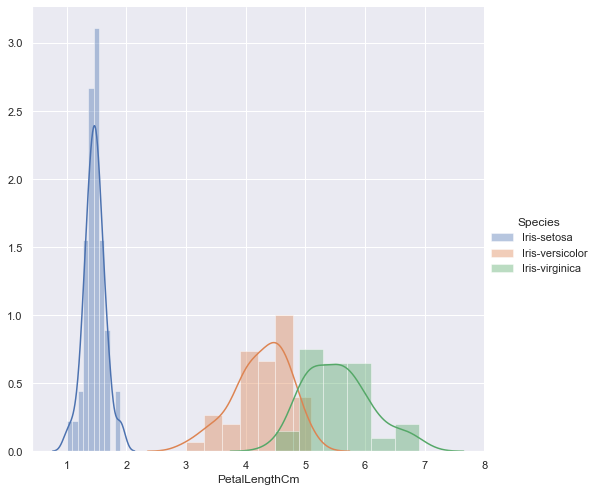

In [19]:
ss.FacetGrid(iris,hue="Species",height=7)\
   .map(ss.distplot,"PetalLengthCm")\
   .add_legend();
plt.show()

<h4><b>Plotting the PetalWidth FacetGrid for different species for getting the Frequency Distrubution</b></h4>

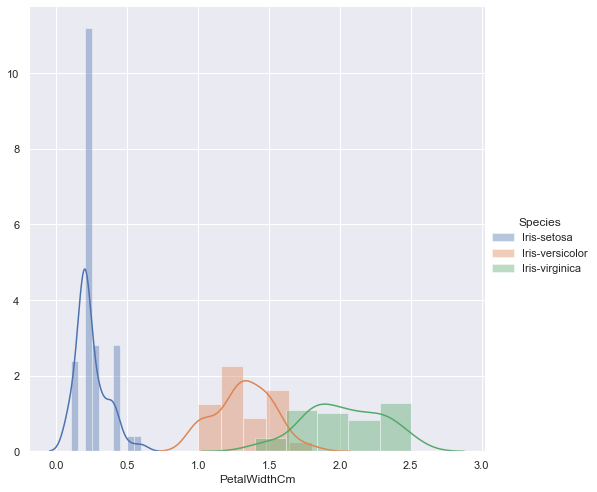

In [20]:
ss.FacetGrid(iris,hue="Species",height=7)\
   .map(ss.distplot,"PetalWidthCm")\
   .add_legend();
plt.show()

<h4><b>Plotting the SepalWidth FacetGrid for different species for getting the Frequency Distrubution</b></h4>

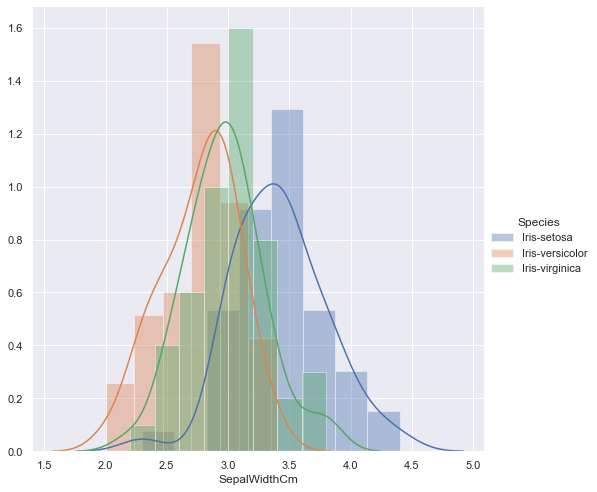

In [21]:
ss.FacetGrid(iris,hue="Species",height=7)\
   .map(ss.distplot,"SepalWidthCm")\
   .add_legend();
plt.show()

<h4><b>Plotting the SepalLength FacetGrid for different species for getting the Frequency Distrubution</b></h4>

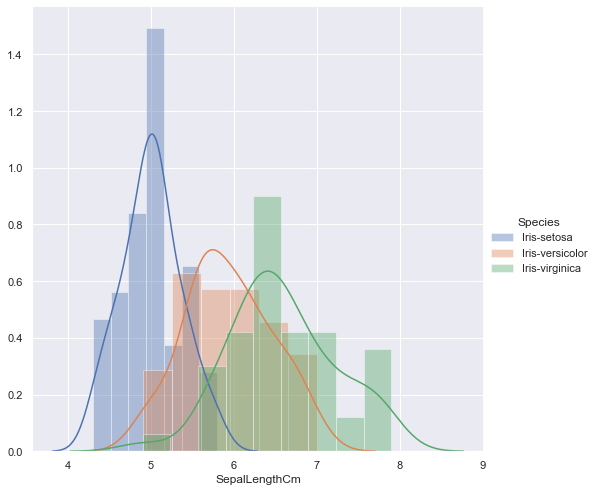

In [22]:
ss.FacetGrid(iris,hue="Species",height=7)\
   .map(ss.distplot,"SepalLengthCm")\
   .add_legend();
plt.show()

<h4><b>Plotting the IRIS SETOSA Characteristics boxplot to derive the range of values</b></h4>

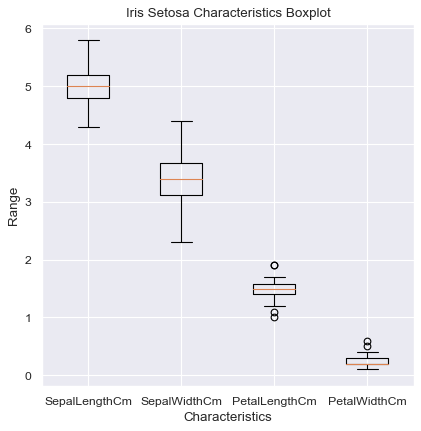

In [23]:
plt.figure(figsize=(6, 6), dpi=80)
data1 = iris[iris["Species"]=="Iris-setosa"][['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
plt.boxplot(data1)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.title("Iris Setosa Characteristics Boxplot")
plt.xlabel("Characteristics")
plt.ylabel("Range")
plt.show()

<h4><b>Plotting the IRIS VERSICOLOR Characteristics boxplot to derive the range of values</b></h4>

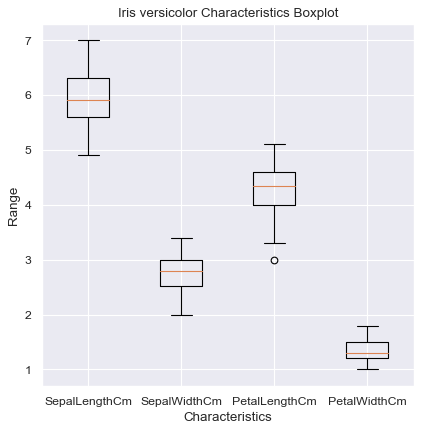

In [24]:
plt.figure(figsize=(6, 6), dpi=80)
data2 = iris[iris["Species"]=="Iris-versicolor"][['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
plt.boxplot(data2)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.title("Iris versicolor Characteristics Boxplot")
plt.xlabel("Characteristics")
plt.ylabel("Range")
plt.show()

<h4><b>Plotting the IRIS VIRGINICA Characteristics boxplot to derive the range of values</b></h4>

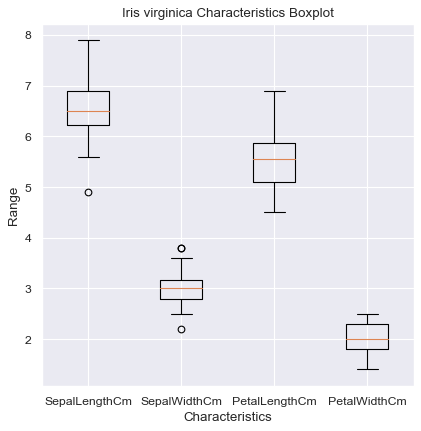

In [25]:
plt.figure(figsize=(6, 6), dpi=80)
data3 = iris[iris["Species"]=="Iris-virginica"][['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
plt.boxplot(data3)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.title("Iris virginica Characteristics Boxplot")
plt.xlabel("Characteristics")
plt.ylabel("Range")
plt.show()

<h2><b><u>Working with the K-Means Clustering Algorithm</u></b></h2>

<h4><b>Data Preperation</b></h4>

In [26]:
X = iris.iloc[:,[0,1,2,3]].values

<h4><b>The Elbow method</b></h4>

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

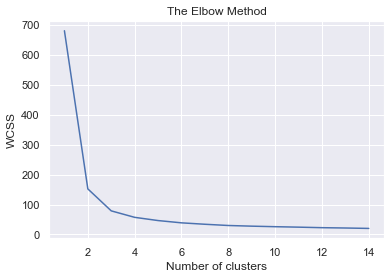

In [28]:
plt.plot(range(1,15), wcss)  
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph we can derive that the best possible no of clusters is 3

<h4><b>Data Modelling</b></h4>

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<h4><b>Centroids of the 3 clusters</b></h4>

In [30]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

<h4><b>Plotting the clusters in a scatter plot</b></h4>

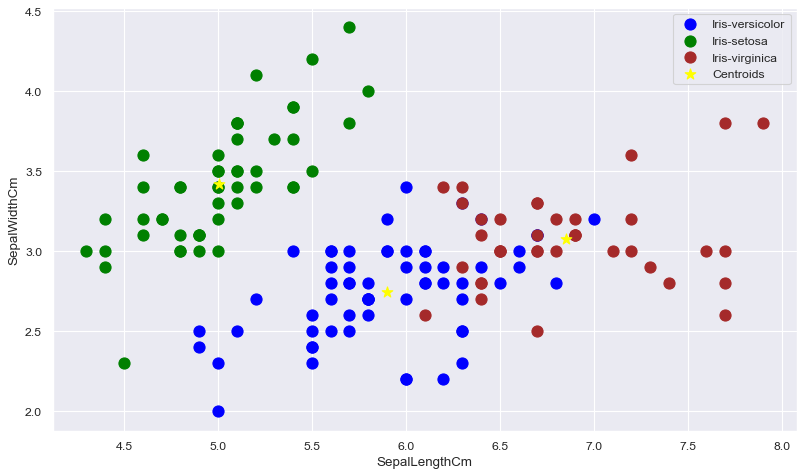

In [31]:
plt.figure(figsize=(12, 7), dpi=80)

plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],
           s=100,c="blue",label='Iris-versicolor')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],
           s=100,c="green",label='Iris-setosa')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],
           s=100,c="brown",label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids',marker='*')

plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

ss.set_theme()

plt.legend(loc="upper right")

<h5><b>Deriving the clusters accordingly:</b></h5>
Iris - Setosa = 1</br>
Iris - versicolor = 0</br>
Iris - virginica = 2</br>

<h4><b>Matching the predicted clusters with the original clusters</b></h4>

In [32]:
count=0
count_set=0
count_ver=0
count_vir=0

for i in range(150):
    if y_original[i]==y_pred[i]:
        count+=1
    if y_original[i]==y_pred[i]==1:
        count_set+=1
    if y_original[i]==y_pred[i]==0:
        count_ver+=1
    if y_original[i]==y_pred[i]==2:
        count_vir+=1

In [33]:
print("Correct Clustering Samples Ration:",count,"/ 150")

Correct Clustering Samples Ration: 134 / 150


In [34]:
print("Correct Setosa Clustering Samples Ration:",count_set,"/ 150")

Correct Setosa Clustering Samples Ration: 50 / 150


In [35]:
print("Correct Versicolor Clustering Samples Ration:",count_ver,"/ 150")

Correct Versicolor Clustering Samples Ration: 48 / 150


In [36]:
print("Correct Virginica Clustering Samples Ration:",count_vir,"/ 150")

Correct Virginica Clustering Samples Ration: 36 / 150


<center><h2><b>Thanks for Reading!!!Do star the Repo...</b></h2></center>